# Data Cleaning

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

from src.data import make_dataset
from src.features import clean

%matplotlib inline
sns.set()

In [29]:
data= make_dataset.get_raw_data()
data.head()

,Recency,Frequency,Amount,Times,Donation
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Outliners


In [30]:
data.describe()

,Recency,Frequency,Amount,Times,Donation
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


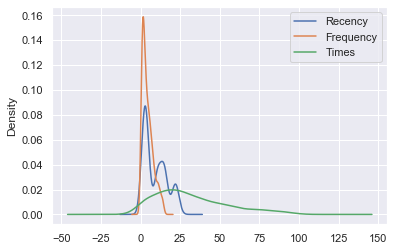

In [31]:
columns = ['Recency', 'Frequency', 'Times']
remove_idx = []
for col in columns:
    series_desc = data.describe()[col]
    iqr = series_desc['75%']-series_desc['25%']
    outliner_min = series_desc['25%']-(iqr*1.5)
    outliner_max = series_desc['75%']+(iqr*1.5)
    remove_idx.append(data[data[col]<outliner_min].index.tolist())
    remove_idx.append(data[data[col]>outliner_max].index.tolist())

[data.drop(idx, inplace=True) for idx in remove_idx]
data.reset_index(inplace=True, drop=True)

data[columns].plot.kde()

In [32]:
data.head()

,Recency,Frequency,Amount,Times,Donation
0,0,13,3250,28,1
1,4,4,1000,4,0
2,2,7,1750,14,1
3,1,12,3000,35,0
4,2,9,2250,22,1


## Basic feature selection

In [33]:
features = data[columns]
target = data['Donation']

## Distribution fix
Basic features selected: Recency, Frequency, Times

Removed feature: Monetary/Amount

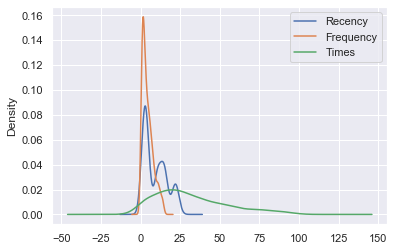

In [34]:
features.plot.kde()

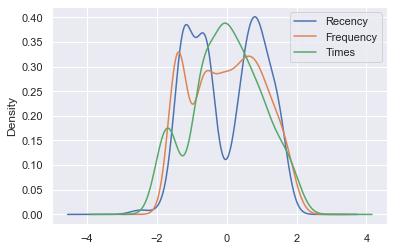

In [35]:
transformer = PowerTransformer()
features_transformed = transformer.fit_transform(features)
 
df_features_transformed = pd.DataFrame(features_transformed, columns=columns)
df_features_transformed.plot.kde()

In [36]:
df_features_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 3 columns):
Recency      696 non-null float64
Frequency    696 non-null float64
Times        696 non-null float64
dtypes: float64(3)
memory usage: 16.4 KB


## Oversampling

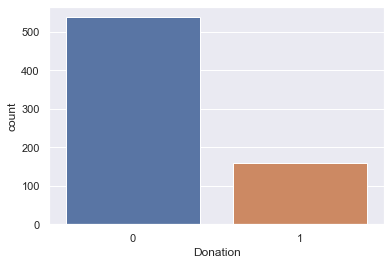

In [37]:
sns.countplot(x='Donation', data=pd.DataFrame(target, columns=['Donation']));

In [38]:
df_features_transformed, target = clean.oversampling(df_features_transformed, target)

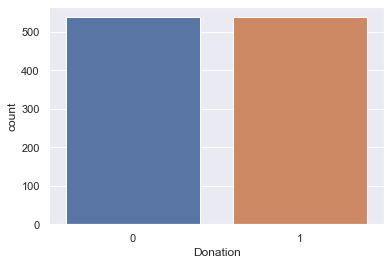

In [39]:
sns.countplot(x='Donation', data=pd.DataFrame(target, columns=['Donation']));

## Save clean data

In [40]:
output_data = np.column_stack((df_features_transformed, target))
output_columns = columns
output_columns.append('Donation')
output = pd.DataFrame(output_data, columns=output_columns)
output.head()

,Recency,Frequency,Times,Donation
0,-2.478795,1.754703,0.064456,1.0
1,-0.602588,0.193206,-1.594860,0.0
2,-1.227058,0.933169,-0.696207,1.0
3,-1.703159,1.649468,0.360557,0.0
4,-1.227058,1.268264,-0.225971,1.0


In [41]:
# output = df_features_transformed
# output['Donation'] = target
make_dataset.save_processed_data(output, "transfusion_2_oversampled.csv")